<H2 style="color:blue; text-align: center;"> Data Analytics with Python</H2>
<H3 style="color:green; text-align: center;"> Lecture 10 (MDM)</H3>
<H3 style="color:red; text-align: center;"> Analysis of Variance (ANOVA)</H3>
<H4 style="color:Magenta; text-align: center;"> By Ajit Kumar (ICT Mumbai)</H4>
<H4 style="color:Maroon; text-align: center;"> Feb. 27, 2025</H4>
<HR style="height:2px;size:30;background-color:Olive"></HR>

# Analysis of Variance (ANOVA)

**What is Analysis of Variance (ANOVA)?**

ANOVA consists of classifying and cross classifying statistical results and
testing whether the mean of the specified classification differs significantly.
Thus it tests whether the given classification is important in affecting the
results.
Analysis of variance enables us to analyze the total variation of our data
into components which may be attributed to various sources or cause of
variation.

**Assumtions in ANOVA**

* Populations from which samples are drawn are normally distributed.
* The poulations variances from which samples are drawn are equal 
	$$
 \sigma_1^2=\sigma_2^2=\cdots=\sigma_n^2.
 $$
 * The individuals being observed have been randomly selected from the populations represented by the samples.

**Observations:**
\begin{array}{ccccccccc}
Treatments &  Obs 1 & Obs 2 & Obs 3 &  \cdots  &  Last~Obs& Total & Mean \\[2mm]
T_1 & y_{11} &  y_{12}  &  y_{13}  &  \cdots  &  y_{1n_1}  &  y_{1.} &  \overline{y}_{1.}  \\[2mm]
T_2 &  y_{21}  &  y_{22}  &  y_{23}  &  \cdots  &  y_{2n_2}  &  y_{2.} &  \overline{y}_{2.}  \\[2mm]%\hline
T_3 &  y_{31}  &  y_{32}  &  y_{33}  &  \cdots  &  y_{3n_3}  &  y_{3.} &  \overline{y}_{3.}  \\[2mm]
\vdots&\vdots& \vdots &\vdots&&\vdots&\vdots&\vdots\\%\hline
T_k  &  y_{k1}  &  y_{k2}  &  y_{k3}  &  \cdots  &  y_{kn_k} &  y_{k.} &  \overline{y}_{k.}   \\[2mm]
\hline
Total&  y_{.1}  &  y_{.2}  &  y_{.3}  &  \cdots  &  y_{.n_k} &  y_{..} &  \overline{y}_{..}   \\[2mm]
Mean &  \overline{y}_{.1}  &  \overline{y}_{.2}  &  \overline{y}_{.3}  &  \cdots  &  \overline{y}_{.n_k} &  \overline{y}_{..} &  \overline{y}_{..}  \\[2mm]
\end{array}


The data is considers as $y_{ij}$. The model we are fitting is  
$$
Y_{ij}=\mu+\mu_i+\epsilon_{ij} \text{ for } i=1,2,\ldots, k; j=1,2,\ldots,n_i
$$

$\mu:$ overall mean

$\mu_i$-ith treatment mean.

$\epsilon_{ij}$: Error, Independent, Normally Dist. with $N(0, \sigma^2)$. 


**Null Hypothesis**
* $H_0$: $\mu_1=\mu_2=\cdots = \mu_k$

**Alternative Hypothesis**

* $H_1$: At least two of the $\mu_i's$ are different. That is, there exists $i$ and $j$,$i\neq j$ such that 
$\mu_i\neq \mu_j$.

**Notations:**

 $$
y_{i.}=\sum_{j=1}^{n_i}{y_{ij}}\quad  y_{..}=\sum_{i=1}^k y_{ij},\quad C=\frac{\left(y_{..}\right)^2}{N}
$$

\begin{eqnarray*}
\sum_{i=1}^{k}\sum_{j=1}^{n_i}(y_{ij}-\overline{y}_{..})^2 &=& \sum_{i=1}^{k}\sum_{j=1}^{n_i}\left[y_{ij}-\overline{y}_{i.}+\overline{y}_{i.}-\overline{y}_{..}\right]^2\\
&=&\sum_{i=1}^{k}\sum_{j=1}^{n_i}(\overline{y}_{i.}-\overline{y}_{..})^2+\sum_{i=1}^{k}\sum_{j=1}^{n_i}(y_{ij}-\overline{y}_{i.})^2\\
&=& n_i\sum_{i=1}^{k}(\overline{y}_{i.}-\overline{y}_{..})^2+\sum_{i=1}^{k}\sum_{j=1}^{n_i}(y_{ij}-\overline{y}_{i.})^2\\
\end{eqnarray*}
Thus we have 
$$ SS_T=SS{(Tr)}+SS_E.$$

* $SS_T$ is called the total sum of squares.

* $SS(Tr)$ is called the treatment sum of squares or between sample sum of squares.

* $SS_E$ is called error sum of squares of within sample sum of squares. 

**One-Way ANOVA Table:**

\begin{array}{|c|c|c|c|c|}\hline
	Source~of & Degree~of & Sum~of & Mean~Square &  F \\
	variation & freedom & square &  & \\\hline
	&&&&\\
	Treatment &  k-1  &  SS(Tr)  &  MS(Tr)=\frac{SS_{Tr}}{k-1}  & \\
	&&& &  \frac{MS(Tr)}{MSE} \\
	Error &  N-k  &  SSE  &  MSE=\frac{SSE}{N-k}  & \\
	Total &  N-1  &  SST  && \\\hline
\end{array}

**Short-Cut Calculations.**

$$
SST=\sum \sum y_{ij}^2-C,
\quad SS(Tr)=\sum_{i=1}^k{\frac{y_{i.}^2}{n_i}}-C
$$

and 
$$
SSE=SST-SS(Tr)
$$

## Example 1
The PlantGrowth dataset is a built-in dataset in R, containing data on plant growth under different treatment conditions. It includes: weight: The weight of the plant. group: The treatment group to which the plant belongs. Test  the null hypothesis that the mean weight of the plant is same under three different treatment. In particular, test if the treament is a statistically significant at 5% signinificance.

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile)
data

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


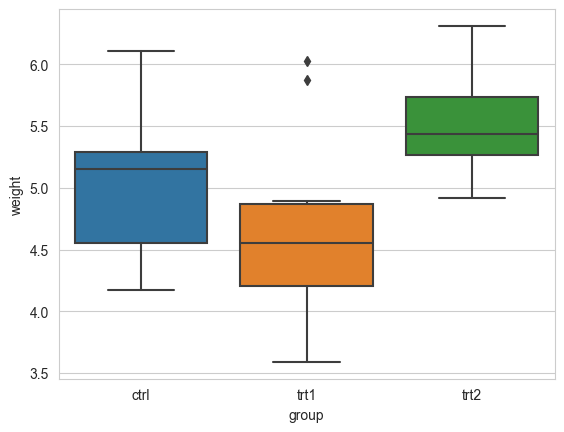

In [6]:
sns.set_style("whitegrid")  
sns.boxplot(x = 'group', y = 'weight', data = data)
plt.show()

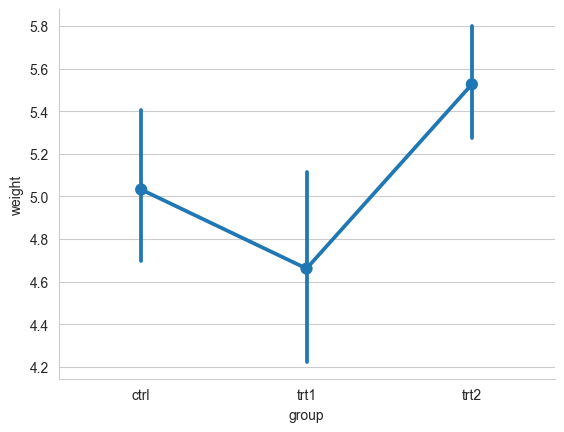

In [7]:
fig = sns.pointplot(x='group', y = 'weight', data = data)
sns.despine()

In [21]:
k = len(pd.unique(data.group))  # number of treatments
N = len(data.values) # total data
df_T = N-1 # total degree of freedoms
df_Tr = k-1 # Treatment degree of freedoms
df_E = N-k # Error degree of freedoms
grand_mean = data['weight'].mean() # overall mean
# Total sum of squares
SST = sum((data.weight-grand_mean)**2) # Total sum of square
# Treatment sum of squares
SSTr = sum([(data[data.group==tr].weight.mean()-grand_mean)**2 for tr in data.group])
# Error sum of squares
SSE = SST - SSTr
# Treatment Mean Squares
MSTr = SSTr/df_Tr
# Error Mean Squares
MSE = SSE/df_E
F_stat = MSTr/MSE # F-statistics
p_val = stats.f.sf(F_stat, df_Tr, df_E) # P=value
F_stat,p_val

(4.846087862380141, 0.015909958325622836)

In [23]:
results = {'df':[df_Tr, df_E, df_T], 'Sum of Squares':[SSTr, SSE, SST],
           'Mean Squares':[MSTr, MSE, ''],
           'F':[F_stat, "NA", "NA"],
            'P-val':[p_val, "NA","NA"]}
columns=['df', 'Sum of Squares', 'Mean Squares','F', 'PR(>F)']
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['Treatment', 'Error',  'Total'])
aov_table1

,df,Sum of Squares,Mean Squares,F,PR(>F)
Treatment,2,3.76634,1.88317,4.846088,NaN
Error,27,10.49209,0.388596,NA,NaN
Total,29,14.25843,,NA,NaN


### ANOVA using statsmodel package

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('weight ~ group',
                data=data).fit()              
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


## Example 2

A clinical trial of testing a new antidepressant drug called Joyzepam is done. In order to construct a fair test of the drug’s effectiveness, the study involves three separate drugs (i) placebo (ii) anxifree and (iii) joyzepam  to be administered. A collection of 18 participants with moderate to severe depression are recruited for your initial testing. Because the drugs are sometimes administered in conjunction with psychological therapy, study includes 9 people undergoing cognitive behavioural therapy (CBT) and 9 who are not. Participants are randomly assigned (doubly blinded, of course) a treatment, such that there are 3 CBT people and 3 no-therapy people assigned to each of the 3 drugs. A psychologist assesses the mood of each person after a 3 month run with each drug: and the overall improvement in each person’s mood is assessed on a scale ranging from -5 to 5.

The question that we want to answer is: are these difference “real”, or are they just due to chance?

In [5]:
import seaborn as snb

In [11]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/clintrial.csv")
df

,drug,therapy,mood_gain
0,placebo,no.therapy,0.5
1,placebo,no.therapy,0.3
2,placebo,no.therapy,0.1
3,anxifree,no.therapy,0.6
4,anxifree,no.therapy,0.4
5,anxifree,no.therapy,0.2
6,joyzepam,no.therapy,1.4
7,joyzepam,no.therapy,1.7
8,joyzepam,no.therapy,1.3
9,placebo,CBT,0.6


In [7]:
pd.crosstab(df['drug'], df['therapy'])

therapy,CBT,no.therapy
drug,,
anxifree,3,3
joyzepam,3,3
placebo,3,3


In [8]:
df.groupby('drug')['mood_gain'].agg(['mean', 'std'])

,mean,std
drug,,
anxifree,0.716667,0.392003
joyzepam,1.483333,0.213698
placebo,0.450000,0.281069


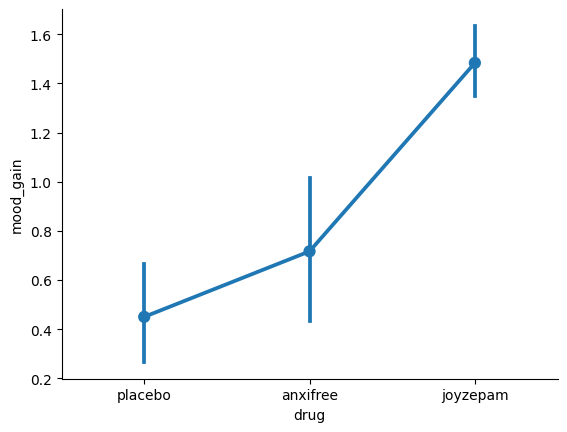

In [9]:
import seaborn as sns
fig = sns.pointplot(x='drug', y = 'mood_gain', data = df)
sns.despine()

The results are shown in the figure above, which plots the average mood gain for all three conditions; error bars show 95% confidence intervals.

In [10]:
# select the columns from the dataframe with the group and outcome measure data
# this is not strictly necessary, but it makes it clearer what we are doing when we plug these data back into the new dataframe Y
group = df['drug']
outcome = df['mood_gain']

# make a new dataframe called grouped, in which our data are associated by which group (drug treatment) the participant was in
grouped = df.groupby('drug')

# make a dataframe with the mean values for each group
gp_means = grouped.mean(numeric_only=True)

# flatten the indices of the new dataframe gp_means, because multiindices can be pretty annoying
gp_means.reset_index(inplace=True)

# make a list (grouped_means) that the is the length of the number of participants (which we get from the length of the variable "group",
# which contained all the rows of the original dataframe)
grouped_means = [0]*len(group)

# go through every row in the dataframe "gp_means", which contains the names of the three drugs,
# then check in every row of the variable group (which contains the drug name for each participant)
# and if the drug names match, put the mean mood gain in the corresponding row of "grouped_means"
for s, val in enumerate(gp_means['drug']):
    for x, drug in enumerate(group):
        if val == drug:
            grouped_means[x] = round(gp_means['mood_gain'][s],2)

# build a new dataframe Y with a row for each participant, with columns for drug name (group), each participants' outcome (mood gain),
# and the average (mean) mood gain for all particpants who were in the same treatment group.
Y = pd.DataFrame(
    {'group': group,
     'outcome': outcome,
     'group_means': grouped_means
    }) 

# add a column to the dataframe Y showing the distance (residual) of each individual from their group's mean
Y['dev_from_group_means'] = Y['outcome'] - Y['group_means']

# add a column to the dataframe Y with the same values as the column before (residuals), but squared (multiplied by themeselves)
Y['squared_devs'] = Y['dev_from_group_means']**2

In [6]:
Y

,group,outcome,group_means,dev_from_group_means,squared_devs
0,placebo,0.5,0.45,0.05,0.0025
1,placebo,0.3,0.45,-0.15,0.0225
2,placebo,0.1,0.45,-0.35,0.1225
3,anxifree,0.6,0.72,-0.12,0.0144
4,anxifree,0.4,0.72,-0.32,0.1024
5,anxifree,0.2,0.72,-0.52,0.2704
6,joyzepam,1.4,1.48,-0.08,0.0064
7,joyzepam,1.7,1.48,0.22,0.0484
8,joyzepam,1.3,1.48,-0.18,0.0324
9,placebo,0.6,0.45,0.15,0.0225


In [11]:
SSw = Y['squared_devs'].sum()
SSw

1.3918000000000001

In [12]:
grouped = df.groupby('drug')
gp_means = grouped.mean(numeric_only=True)
gp_means.reset_index(inplace=True)
group = list(gp_means['drug'])
gp_means = list(gp_means['mood_gain'])

grand_mean = round(df['mood_gain'].mean(),2)
grand_mean = [grand_mean]*3



Y = pd.DataFrame(
    {'group': group,
     'gp_means': gp_means,
     'grand_mean': grand_mean 
    }) 

Y['dev_from_grandmean'] = Y['gp_means'] - Y['grand_mean']
Y['squared_devs'] = Y['dev_from_grandmean']**2

xtab = pd.crosstab(index = df["drug"], columns = "count")
xtab.reset_index(inplace=True)

Y['group_sizes'] = xtab['count']
Y['weighted_squared_devs'] = Y['group_sizes'] * Y['squared_devs']

In [9]:
Y

,group,gp_means,grand_mean,dev_from_grandmean,squared_devs,group_sizes,weighted_squared_devs
0,anxifree,0.716667,0.88,-0.163333,0.026678,6,0.160067
1,joyzepam,1.483333,0.88,0.603333,0.364011,6,2.184067
2,placebo,0.450000,0.88,-0.430000,0.184900,6,1.109400


In [13]:
SSb = sum(Y['weighted_squared_devs'])
SSb

3.453533333333334

In [14]:
from scipy import stats
p = 1-stats.f.cdf(18.6, 2, 15)
p

8.672726890401883e-05

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'mood_gain ~ drug'

model = ols(formula, data=df).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
drug,3.453333,2.0,18.610778,0.000086
Residual,1.391667,15.0,NaN,NaN


In [16]:
import pingouin as pg

pg.anova(dv='mood_gain', 
         between='drug', 
         data=df,
         detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,drug,3.453333,2,1.726667,18.610778,0.000086,0.712762
1,Within,1.391667,15,0.092778,NaN,NaN,NaN


In [17]:
SStot = SSb + SSw          # total sums of squares
eta_squared = SSb / SStot  # eta-squared value
eta_squared

0.7127545404512933

### Using pingouin package

In [12]:
import pingouin as pg

pg.anova(dv='mood_gain', 
         between='drug', 
         data=df,
         detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,drug,3.453333,2,1.726667,18.610778,0.000086,0.712762
1,Within,1.391667,15,0.092778,NaN,NaN,NaN


### Example 3

In [65]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [66]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_melt

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


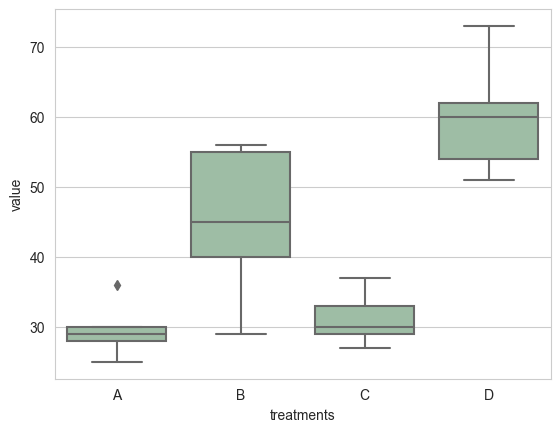

In [67]:
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
plt.show()

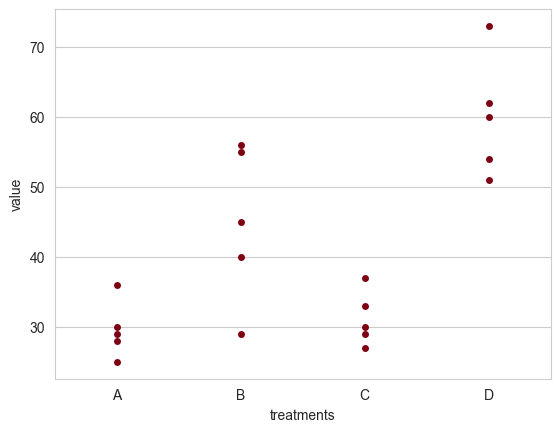

In [68]:
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [69]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

17.492810457516338 2.6392411462109217e-05


,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [71]:
#!pip install bioinfokit

In [72]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [73]:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']
print(aov_table)

            sum_sq    df         F   PR(>F)     EtaSq
group      3.76634   2.0  4.846088  0.01591  0.264148
Residual  10.49209  27.0       NaN      NaN       NaN
